# import

In [1]:
import sys
sys.path.append("/glade/u/home/geethma/phd_research_home/functions")
from functions.imports import *

ERROR 1: PROJ: proj_create_from_database: Open of /glade/u/home/geethma/.conda/envs/wgh/share/proj failed


# subsidence regimes

In [2]:
from cyclone_composite_PPE_jw.get_data_arr import get_data

In [3]:
all_en = np.arange(263)
skip_value = [22, 26, 137, 156, 188, 191, 192, 198, 223]
new_en = np.delete(all_en, skip_value)

In [6]:
new_en = np.arange(12)

In [10]:
dataout = get_data(new_en,type_data='mean')

In [11]:
omg500 = dataout['OMEGA500']

In [12]:
lwp = dataout["TGCLDLWP"]

In [13]:
for i in range(len(new_en)):  # range(np.shape(omg500)[0]):
    print(np.shape(omg500[i]))
    print(np.shape(lwp[i]))

(8148,)
(8148,)
(8217,)
(8217,)
(8297,)
(8297,)
(8177,)
(8177,)
(8146,)
(8146,)
(8151,)
(8151,)
(8163,)
(8163,)
(8172,)
(8172,)
(8142,)
(8142,)
(8239,)
(8239,)
(8138,)
(8138,)
(8163,)
(8163,)


# global feedback function

In [9]:
def globalFB(var='map_dLWP4K'):
    wd  = '/glade/campaign/uwyo/wyom0131/delLWP/lats_15_40/'
    fns = np.sort(glob.glob(wd+'*ffv2.npz'))
    ensembles = []
    maps = []
    
    for i in range(len(fns)):  # 
        data = np.load(fns[i], allow_pickle=True)
        maps.append(xr.DataArray(
            data[var], 
            dims = ['lat', 'lon'], 
            coords={'lat': data['lat'], 'lon': data['lon']}
        ))
        ensembles.append(data['ensn'])
        
    
    maps = xr.DataArray(
        maps, 
        dims = ['ensn', 'lat', 'lon'],
        coords={'ensn': ensembles, 'lat': data['lat'], 'lon': data['lon']}
    )

    del_LWP_lat = maps.mean(dim=['lon'], skipna=True)
    weights = np.cos(np.deg2rad(del_LWP_lat.lat))
    weights.name = "weights"
    del_LWP_lat_weighted = del_LWP_lat.weighted(weights)
    del_LWP_mean = del_LWP_lat_weighted.mean(dim=['lat'], skipna=True)

    return del_LWP_mean

# global cyclone compositing data for latitude bands

In [2]:
from cyclone_composite_PPE.get_data_arr import get_data

In [3]:
# def globalCyclone():
# for lat bands 50-80N
all_en = np.arange(263)
skip_value = [22, 26, 137, 156, 188, 191, 192, 198, 223]
new_en = np.delete(all_en, skip_value)

get_var = get_data(new_en, type_data='comp')

lat = get_var['lat']
lon = get_var['lon']
# Get the cyclone numbers non-nan fracton>0.5
new_ens = []
new_lats = [np.nan for _ in range(len(new_en))]
new_lons = [np.nan for _ in range(len(new_en))]
for i in range(len(new_en)): # 
    # get latitudes band
    arr  = lat[i].copy()
    arr  = np.array(arr)
    '''change here to update the latitude range'''
    max_l = 80
    min_l = 50

    ind = np.where((arr > max_l) | (arr < min_l))
    arr[ind] = np.nan
    arr_lon  = lon[i].copy()
    arr_lon[ind] = np.nan
    new_lats[i] = arr
    new_lons[i] = arr_lon


     # check non-Nan of a composite to be > 0.5
    cyc_num = []
    var = get_var['TGCLDLWP'][i]
    var[:,:,ind] = np.nan # for one hemisphere

    for cyc in range(var.shape[2]): #
        flat_var = np.ravel(var[:,:,cyc])
        find = np.where(np.isnan(flat_var)==False)
        frac = np.shape(find)[1]/np.shape(flat_var)[0]
        if frac > 0.5:
            cyc_num.append(cyc)
    new_ens.append(np.ravel(cyc_num))

dataout = get_data(new_en,type_data='mean') # runs through n number of PPE with the stat
lwp = dataout['TGCLDLWP'] #[kg/m2]
u   = dataout['U10'] #[m/s]
w   = dataout['TMQ'] #kg/m2

########### with the weighted gradient 
########## calculate gradients for each ensemble
num_bins = 10
grad = [np.nan for _ in range(len(new_en))]

for en in range(len(new_en)): # 
    try:
        lwp_i = lwp[en][new_ens[en]]
        wcb_i = u[en][new_ens[en]] * w[en][new_ens[en]] *2.66e-7*86400
        # wcb_i   = (dataout['PRECC'][en][new_ens[en]]+dataout['PRECL'][en][new_ens[en]])*8.64e7 #[mm/day]
        lwp_bin = stats.binned_statistic(wcb_i, lwp_i, 
                                         statistic='mean', bins=num_bins)[0]
        wcb_bin = stats.binned_statistic(wcb_i, wcb_i, 
                                         statistic='mean', bins=num_bins)[0]
        count   = stats.binned_statistic(wcb_i, wcb_i, 
                                         statistic='count', bins=num_bins)[0]
        grad[en] = np.nansum(
            np.gradient(lwp_bin)/np.gradient(wcb_bin)*count)/np.nansum(count)
    except:
        print(en, new_ens[en])

grad = np.array(grad)
np.savez('PPE_emulator/grad_LWP_WCB_NH3080_all times.npz', 
         grad_LWP_WCB = grad, runs = new_en)


KeyboardInterrupt: 

In [4]:
globalCyclone()

In [11]:
all_en = np.arange(263)
skip_value = [22, 26, 137, 156, 188, 191, 192, 198, 223]
new_en = np.delete(all_en, skip_value)


In [12]:
dataout = get_data(new_en,type_data='mean')


NameError: name 'get_var' is not defined

In [13]:
lat = dataout['lat']
lon = dataout['lon']

In [16]:
np.shape(lat[0])

(8130,)

# global ∆LWP/∆(P-E) - PPE

In [2]:
## get ∆LWP zonal means and the mean
wd  = '/glade/campaign/uwyo/wyom0131/delLWP/lats_15_40/'
# wd  = '/glade/campaign/uwyo/wyom0124/statistics_dan/ff/'  # Also available here. Same files
fns = np.sort(glob.glob(wd+'*ffv2.npz'))
ensembles = []
maps = []

for i in range(len(fns)):  # 
    data = np.load(fns[i], allow_pickle=True)
    maps.append(xr.DataArray(
        data['map_dLWP4K'], 
        dims = ['lat', 'lon'], 
        coords={'lat': data['lat'], 'lon': data['lon']}
    )) #[kg/m2]
    ensembles.append(data['ensn'])
    

maps = xr.DataArray(
    maps, 
    dims = ['ensn', 'lat', 'lon'],
    coords={'ensn': ensembles, 'lat': data['lat'], 'lon': data['lon']}
)

In [3]:
del_LWP_lat = maps.mean(dim=['lon'], skipna=True)
weights = np.cos(np.deg2rad(del_LWP_lat.lat))
weights.name = "weights"
del_LWP_lat_weighted = del_LWP_lat.weighted(weights)
del_LWP_mean = del_LWP_lat_weighted.mean(dim=['lat'], skipna=True)


In [4]:
## get ∆P-E zonal means and the mean
ensembles = []
maps = []
for i in range(len(fns)):
    data=np.load(fns[i], allow_pickle=True)
    maps.append(xr.DataArray(
        data['map_dPE4K']*86400,  #[kg/m2]
        dims = ['lat', 'lon'], 
        coords={'lat': data['lat'], 'lon': data['lon']}
    ))
    ensembles.append(data['ensn'])
    
maps = xr.DataArray(
    maps, 
    dims = ['ensn', 'lat', 'lon'],
    coords={'ensn': ensembles, 'lat': data['lat'], 'lon': data['lon']}
)

In [5]:
del_PE_lat = maps.mean(dim=['lon'], skipna=True)
weights = np.cos(np.deg2rad(del_PE_lat.lat))
weights.name = "weights"
del_PE_lat_weighted = del_PE_lat.weighted(weights)
del_PE_mean = del_PE_lat_weighted.mean(dim=['lat'], skipna=True)


In [6]:
### take ∆LWP/∆P-E
del_LWP_PE_c = del_LWP_mean/del_PE_mean

In [7]:
np.savez('PPE_emulator/del_LWP_PE_global.npz', del_LWP_PE=del_LWP_PE_c, runs=del_LWP_PE_c.ensn.data)

# global FB save from the function

In [13]:
del_LWP_mean_f = globalFB('map_dLWP4K')

In [16]:
del_PE_mean_f = globalFB('map_dPE4K')*86400

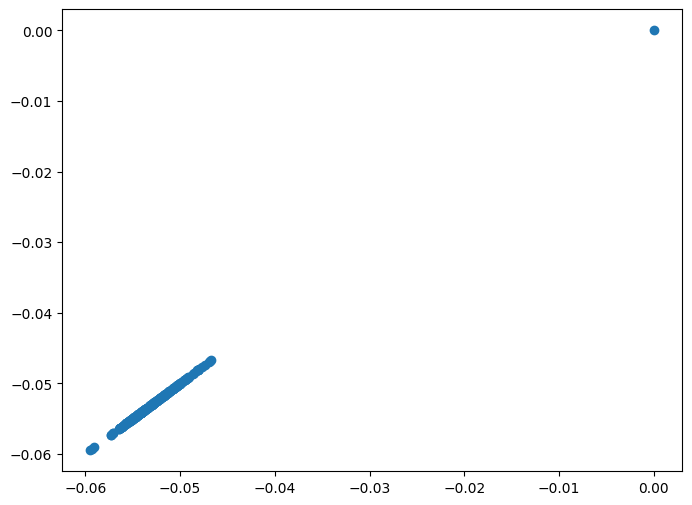

In [17]:
plt.scatter(del_PE_mean_f, del_PE_mean)

In [18]:
del_CRE_mean_f = globalFB('map_dSWCF4K')

In [2]:
np.savez('PPE_emulator/del_CRE_global.npz', del_CRE_mean=del_CRE_mean_f,
         runs=del_CRE_mean_f.ensn.data)

NameError: name 'del_CRE_mean_f' is not defined

# EC precip efficiency vs SWCF

In [3]:
file = np.load('PPE_emulator/del_CRE_global.npz')
PPE_del_CRE_mean = xr.DataArray(
    file['del_CRE_mean'], 
    dims=['runs'], 
    coords={'runs': file['runs']}
)

In [4]:
file = np.load('PPE_emulator/del_LWP_PE_global.npz')
del_LWP_PE = xr.DataArray(file['del_LWP_PE'], 
                          dims=['runs'], 
                          coords={'runs':file['runs']}
                         )



In [5]:
file = np.load('PPE_emulator/grad_LWP_WCB_SH_summer_moisteningLats_new.npz')
# convert np array to xarrays
PPE_grad_LWP_WCB = xr.DataArray(file['grad_LWP_WCB'],
                                dims=['runs'],
                                coords={'runs': file['runs']}
                               )

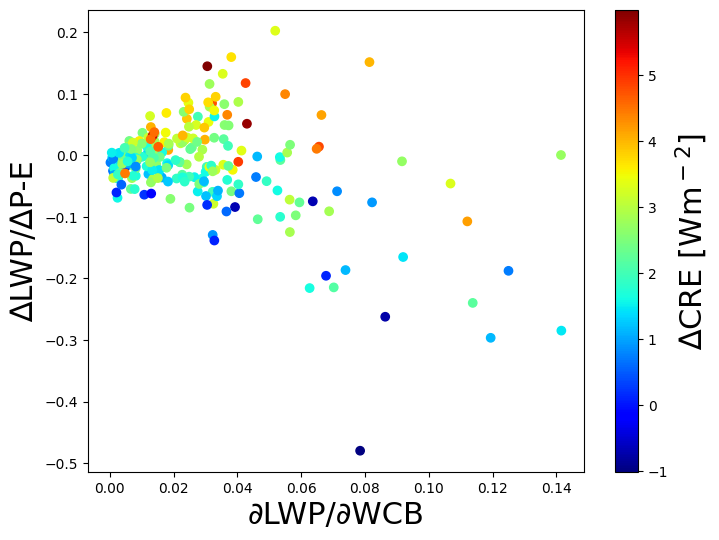

In [11]:
plt.scatter(PPE_grad_LWP_WCB, del_LWP_PE, c=PPE_del_CRE_mean,cmap='jet') #
plt.xlabel('∂LWP/∂WCB')
plt.ylabel('∆LWP/∆P-E')
cbar = plt.colorbar(label='∆CRE [Wm$^-$$^2$]')

# correlation of ∂LWP/∂WCB with ∆LWP/∆P-E on 2D map

In [3]:
file = np.load('PPE_emulator/grad_LWP_WCB_NH5080_alltimes.npz')
# convert np array to xarrays
PPE_grad_LWP_WCB = xr.DataArray(
    file['grad_LWP_WCB'],
    dims=['runs'],
    coords={'runs': file['runs']}
)


In [5]:
file = np.load('PPE_emulator/del_LWP_PE_NH5080_alltimes.npz')
PPE_del_LWP_PE = xr.DataArray(
    file['del_LWP_PE'], 
    dims=['runs'], 
    coords={'runs': file['runs']}
)

In [6]:
PPE_del_LWP_PE

<xarray.DataArray (runs: 254)>
array([ 4.26474295e-02, -3.49814251e-04,  9.82240511e-04, -1.21340230e-02,
        4.40074903e-02,  3.34869978e-02,  2.35969769e-02, -1.24542165e-03,
        1.26093273e-03,  7.45473697e-03,  1.55521304e-02,  2.01577087e-02,
        2.88901081e-02, -2.08217771e-03,  2.45653199e-03, -6.44784490e-03,
        7.39039815e-03,  2.15013136e-02,  1.99778045e-02, -7.23522929e-03,
        4.03406714e-03,  3.98563753e-03, -2.50172834e-03, -2.25398944e-02,
        1.09061070e-02,  1.14203347e-02,  7.63442504e-02,  2.64308690e-02,
        4.06343250e-03,  3.01607453e-04,  1.22572575e-02,  5.55311260e-02,
        2.02072955e-02, -9.81665246e-03,  5.21694110e-02,  3.73763769e-03,
       -4.61768887e-03,  9.65720049e-02, -2.70893107e-02,  3.68730308e-03,
        3.52392692e-03, -3.08894149e-03,  1.16867091e-01,  1.18732824e-02,
       -5.01585611e-04,  3.81588886e-03,  1.44037927e-02,  2.05935306e-02,
        4.01927028e-03, -5.74333664e-03, -1.69312598e-03, -1.56611445e-03,
       -2.08140366e-02,  2.08992541e-02,  1.10917324e-02, -4.02459554e-03,
       -5.38900526e-03, -2.41223182e-03, -4.28727059e-03,  3.51833738e-02,
        5.76339304e-03, -6.06598497e-03,  6.85946193e-03,  9.50187760e-02,
       -2.28512612e-04, -4.14356337e-03, -1.24898994e-02,  1.70500353e-02,
        1.49105636e-02,  1.90839934e-03,  4.00037399e-02,  1.70043970e-04,
        1.60723693e-02, -2.17166392e-03,  1.86346089e-02,  9.48965696e-02,
        4.28531656e-02,  4.70590879e-03,  7.40971552e-02, -4.45385861e-03,
...
        3.52996935e-03, -4.26373899e-03,  5.81983002e-02, -2.55662036e-02,
       -5.43594820e-03,  2.09216041e-02, -2.13762106e-02,  4.66508081e-03,
        6.07572993e-02,  6.23502791e-03,  1.72426198e-02,  1.53600737e-03,
        5.49376526e-02, -8.90320525e-04,  4.50895337e-02,  4.08095201e-03,
        1.36247214e-02,  4.87891710e-02,  1.50546737e-02,  1.89553551e-01,
        1.83165892e-03, -5.93913852e-03,  3.64808673e-02,  9.07552284e-03,
        7.27959232e-03, -1.16207545e-02,  9.13202955e-02,  1.08069783e-04,
       -3.83924276e-03,  1.51081388e-02,  3.16002373e-02,  6.71830194e-03,
       -2.51329626e-03,  3.07919841e-03, -6.08770249e-04,  4.60834209e-02,
       -2.10751158e-02,  4.59249279e-03, -5.24417535e-03, -4.93460191e-04,
        1.98349752e-02,  2.62118928e-02,  7.28859903e-02, -4.73340455e-03,
        7.39690352e-03,  2.81728734e-03,  7.05567093e-04, -7.34290434e-04,
        4.94649991e-02,  2.04908203e-01,  5.44835560e-03, -1.56693804e-02,
        1.75927037e-02,  1.40899770e-03, -3.08351758e-03, -1.14466383e-03,
        9.52106342e-03,  1.00908808e-02, -5.41462212e-04,  4.82867031e-02,
       -2.52719586e-04,  3.26955414e-02,  1.34164858e-02, -1.53097911e-02,
        2.90391097e-02,  1.42195100e-03,  1.16350315e-03, -2.80032724e-03,
        1.28099092e-01,  7.89946277e-03,  5.45738040e-02,  4.42549452e-03,
        1.43027760e-03,  4.05473862e-02, -3.51831160e-04,  1.02521529e-02,
        1.67198173e-03,  6.41788728e-02])
Coordinates:
  * runs     (runs) int64 0 1 2 3 4 5 6 7 8 ... 255 256 257 258 259 260 261 262

In [9]:
correlationNH5080 = stats.spearmanr(PPE_grad_LWP_WCB, PPE_del_LWP_PE, nan_policy='omit')[0]

In [8]:
PPE_grad_LWP_WCB

<xarray.DataArray (runs: 254)>
array([ 1.36199280e-02,  4.35498375e-03,  1.29874056e-04,  2.51324134e-03,
        1.97532636e-02,  6.81687333e-03,  8.72915644e-03,  2.10574867e-03,
        2.67952242e-03,  2.32040082e-03,  1.16865424e-02,  1.20843476e-02,
        8.61468035e-03,  6.68847199e-06, -1.15211656e-03,  1.14781070e-04,
        5.85439403e-03,  2.13571803e-03,  1.33199143e-03,  5.04756080e-03,
        2.30895975e-03,  1.90225608e-03,  6.69455299e-03, -4.76377547e-04,
        1.18235790e-02,  6.24725655e-03,  2.62008569e-02,  1.14261698e-02,
        1.02391740e-03,  1.72238850e-03, -2.10975739e-03,  1.61157530e-02,
        1.08525747e-02,  7.80102635e-06,  1.31245216e-02,  6.51849032e-03,
       -2.02522125e-05,  3.59936514e-02,  4.86674198e-03,  1.44508670e-03,
       -4.97568091e-03, -2.07567216e-03,  5.49607612e-02,  1.92448082e-03,
        1.59095667e-03,  1.98013599e-03,  5.89822286e-03,  1.95485880e-03,
        2.12627087e-03, -1.31725287e-03,  1.92050109e-04,  3.64243166e-03,
        2.43634585e-03,  1.06027194e-02,  7.88576169e-03, -3.09532349e-03,
        5.54379464e-03,  3.57709222e-04, -1.16319309e-04,  1.07734093e-02,
        4.46570319e-04,  4.67798975e-03,  3.10629105e-03,  2.95726480e-02,
        3.86043265e-03, -1.16372895e-04,  2.38616590e-03,  4.21725494e-03,
        1.57674981e-03, -2.60172894e-03,  1.68845040e-02,  2.74472693e-03,
       -2.46964363e-04, -1.92288381e-04,  1.24998510e-02,  2.57588552e-02,
        7.82831307e-03,  3.69032730e-03,  2.18970553e-02,  3.61949239e-03,
...
        8.69107361e-04,  1.78757711e-03,  1.20332487e-02, -8.57998001e-04,
        7.73059291e-03,  1.45145884e-02,  7.49412609e-03,  5.98070615e-03,
        2.07371381e-02,  3.38121552e-04,  5.75500378e-03, -8.14703611e-04,
        1.38007713e-02,  3.79547088e-03,  7.26348079e-03,  1.27244052e-02,
        5.53852830e-03,  1.96053981e-02, -3.15140762e-04,  4.07588050e-02,
        1.23143792e-03,  5.18177562e-03,  7.19560482e-03,  6.11645442e-03,
        1.01271367e-02,  4.98590836e-03,  3.06284956e-02,  1.19592517e-03,
        2.66817044e-03,  9.20375872e-03,  1.10287477e-02,  3.93375472e-03,
        1.43995261e-03,  4.71681399e-03, -3.13557201e-03,  3.48404468e-02,
        1.34785898e-02,  1.69960781e-03, -1.55979732e-03,  5.89318846e-04,
        1.10012345e-02,  6.07657310e-03,  3.18559152e-02,  2.18853086e-03,
        1.64667436e-03,  5.34751872e-04,  1.68341132e-03,  4.27668865e-03,
        1.75669839e-02,  6.78321211e-02,  3.80056297e-03,  2.50058090e-03,
        1.72927955e-02,  1.02511387e-03, -1.54884558e-03,  2.88903814e-03,
        7.65690912e-03,  5.92767466e-03,  2.75759704e-03,  1.33327975e-02,
        8.31620799e-03,  1.47631914e-02, -4.49944883e-03,  5.03648302e-03,
        1.78357463e-02,  2.19793733e-03,  9.20162301e-03, -1.41307942e-03,
        4.51620376e-02,  4.64319676e-03,  2.70208882e-02,  2.18518355e-03,
        7.67861162e-04,  2.73706792e-02, -1.44712018e-04,  7.39714242e-03,
        3.69307019e-03,  2.35514936e-02])
Coordinates:
  * runs     (runs) int64 0 1 2 3 4 5 6 7 8 ... 255 256 257 258 259 260 261 262

In [10]:
correlationNH5080

0.5897820084742371

In [11]:
file = np.load('PPE_emulator/grad_LWP_WCB_SH5080_alltimes.npz')
# convert np array to xarrays
PPE_grad_LWP_WCB = xr.DataArray(
    file['grad_LWP_WCB'],
    dims=['runs'],
    coords={'runs': file['runs']}
)

file = np.load('PPE_emulator/del_LWP_PE_SH5080_alltimes.npz')
PPE_del_LWP_PE = xr.DataArray(
    file['del_LWP_PE'], 
    dims=['runs'], 
    coords={'runs': file['runs']}
)

correlationSH5080 = stats.spearmanr(PPE_grad_LWP_WCB, PPE_del_LWP_PE, nan_policy='omit')[0]

print(correlationSH5080)

0.30531410846371476


In [12]:
file = np.load('PPE_emulator/grad_LWP_WCB_SH2050_alltimes.npz')
# convert np array to xarrays
PPE_grad_LWP_WCB = xr.DataArray(
    file['grad_LWP_WCB'],
    dims=['runs'],
    coords={'runs': file['runs']}
)

file = np.load('PPE_emulator/del_LWP_PE_SH2050_alltimes.npz')
PPE_del_LWP_PE = xr.DataArray(
    file['del_LWP_PE'], 
    dims=['runs'], 
    coords={'runs': file['runs']}
)

correlationSH2050 = stats.spearmanr(PPE_grad_LWP_WCB, PPE_del_LWP_PE, nan_policy='omit')[0]

print(correlationSH2050)

-0.5837664560704615


In [13]:
file = np.load('PPE_emulator/grad_LWP_WCB_NH2050_alltimes.npz')
# convert np array to xarrays
PPE_grad_LWP_WCB = xr.DataArray(
    file['grad_LWP_WCB'],
    dims=['runs'],
    coords={'runs': file['runs']}
)

file = np.load('PPE_emulator/del_LWP_PE_NH2050_alltimes.npz')
PPE_del_LWP_PE = xr.DataArray(
    file['del_LWP_PE'], 
    dims=['runs'], 
    coords={'runs': file['runs']}
)

correlationNH2050 = stats.spearmanr(PPE_grad_LWP_WCB, PPE_del_LWP_PE, nan_policy='omit')[0]

print(correlationNH2050)

0.37241367556328187


# Test

In [2]:
import sys
sys.path.append("/glade/u/home/geethma/phd_research_home/functions")
from functions.imports import *

from cyclone_composite_PPE.get_data_arr import get_data

# def globalCyclone(max_l, min_l):
# for lat bands 50-80N
all_en = np.arange(263)
skip_value = [22, 26, 137, 156, 188, 191, 192, 198, 223]
new_en = np.delete(all_en, skip_value)

get_var = get_data(new_en, type_data='comp')

lat = get_var['lat']
lon = get_var['lon']
# Get the cyclone numbers non-nan fracton>0.5
new_ens = []
new_lats = [np.nan for _ in range(len(new_en))]
new_lons = [np.nan for _ in range(len(new_en))]
for i in range(len(new_en)): # 
    # get latitudes band
    arr  = lat[i].copy()
    arr  = np.array(arr)
    '''change here to update the latitude range'''
    max_l = 20
    min_l = -20

    ind = np.where((arr > max_l) | (arr < min_l))
    arr[ind] = np.nan
    arr_lon  = lon[i].copy()
    arr_lon[ind] = np.nan
    new_lats[i] = arr
    new_lons[i] = arr_lon


     # check non-Nan of a composite to be > 0.5
    cyc_num = []
    var = get_var['TGCLDLWP'][i]
    var[:,:,ind] = np.nan # for one hemisphere

    for cyc in range(var.shape[2]): #
        flat_var = np.ravel(var[:,:,cyc])
        find = np.where(np.isnan(flat_var)==False)
        frac = np.shape(find)[1]/np.shape(flat_var)[0]
        if frac > 0.5:
            cyc_num.append(cyc)
    new_ens.append(np.ravel(cyc_num))

dataout = get_data(new_en,type_data='mean') # runs through n number of PPE with the stat
lwp = dataout['TGCLDLWP'] #[kg/m2]
u   = dataout['U10'] #[m/s]
w   = dataout['TMQ'] #kg/m2

########### with the weighted gradient 
########## calculate gradients for each ensemble
num_bins = 10
grad = [np.nan for _ in range(len(new_en))]

for en in range(len(new_en)): # 
    # try:
    lwp_i = lwp[en][new_ens[en]]
    wcb_i = u[en][new_ens[en]] * w[en][new_ens[en]] *2.66e-7*86400
    # wcb_i   = (dataout['PRECC'][en][new_ens[en]]+dataout['PRECL'][en][new_ens[en]])*8.64e7 #[mm/day]
    lwp_bin = stats.binned_statistic(wcb_i, lwp_i, 
                                     statistic='mean', bins=num_bins)[0]
    wcb_bin = stats.binned_statistic(wcb_i, wcb_i, 
                                     statistic='mean', bins=num_bins)[0]
    count   = stats.binned_statistic(wcb_i, wcb_i, 
                                     statistic='count', bins=num_bins)[0]
    grad[en] = np.nansum(
        np.gradient(lwp_bin)/np.gradient(wcb_bin)*count)/np.nansum(count)
    # except:
    #     print(en, new_ens[en])

grad = np.array(grad)

IndexError: arrays used as indices must be of integer (or boolean) type

# new data correlation dLWP/dWCB on 2D map

In [18]:
lwp = dataout['TGCLDLWP'] #[kg/m2]
u   = dataout['U10'] #[m/s]
w   = dataout['TMQ'] #kg/m2


In [52]:
all_en = np.arange(263)
skip_value = [22, 26, 137, 156, 188, 191, 192, 198, 223]
new_en = np.delete(all_en, skip_value)

In [53]:
new_en

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 158, 159,
       160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 18

In [54]:
########### with the weighted gradient 
########## calculate gradients for each ensemble
num_bins = 10
# num_ens  = 263
grad     = []#[np.nan for _ in range(254)]
# # bin_c    = [np.nan for _ in range(254)]
# skip_value = [22, 26, 137, 156, 188, 191, 192, 198, 223, 254]

for en in range(len(new_en)):
    # if en in skip_value:
    #     continue
    # print(en)
    lwp_i   = lwp[en]
    prc_i   = u[en] * w[en] *2.66e-7*86400
    lwp_bin = stats.binned_statistic(prc_i, lwp_i, statistic='mean', bins=num_bins)[0]

    prc_bin = stats.binned_statistic(prc_i, prc_i, statistic='mean', bins=num_bins)[0]
    count   = stats.binned_statistic(prc_i, prc_i, statistic='count', bins=num_bins)[0]
    
    grad.append(np.nansum(np.gradient(lwp_bin)/np.gradient(prc_bin)*count)/np.nansum(count))

grad = np.array(grad)
print(grad.shape)   

(254,)


In [47]:
#### take ∆LWP/∆P-E map
wd  = '/glade/campaign/uwyo/wyom0124/statistics_dan/ff/'
fns = np.sort(glob.glob(wd+'*ffv2.npz'))
data= np.load(fns[0])
# print(data['map_PE_PD_f'].shape)
lats = data['lat']
'''change here to update the latitude range'''
max_l = 90
min_l = -90
Ind=(np.abs(lats)<max_l)&(np.abs(lats)>min_l)
lat = lats[Ind]
# indices = np.where((np.abs(lats) > 80) | (np.abs(lats) < 50)) 
# lats[indices] = np.nan
lwp_maps= np.zeros((len(fns),192,288))*np.nan
pe_maps= np.zeros((len(fns),192,288))*np.nan
for i in range(len(fns)):
    data=np.load(fns[i])
    lwp_maps[i]=data['map_dLWP4K']
    pe_maps[i]=data['map_dPE4K']

In [48]:
lwp_pe_map = lwp_maps/pe_maps

/glade/derecho/scratch/geethma/tmp/ipykernel_25276/3033311419.py:1: RuntimeWarning: invalid value encountered in true_divide
  lwp_pe_map = lwp_maps/pe_maps


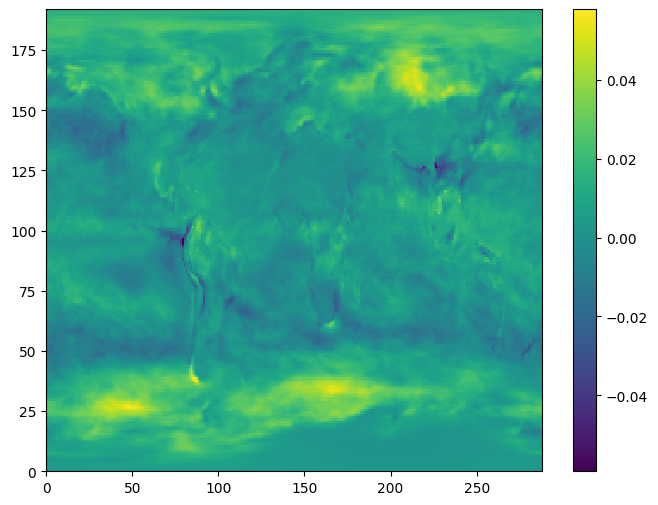

In [43]:
plt.pcolormesh(lwp_maps[0])
plt.colorbar()

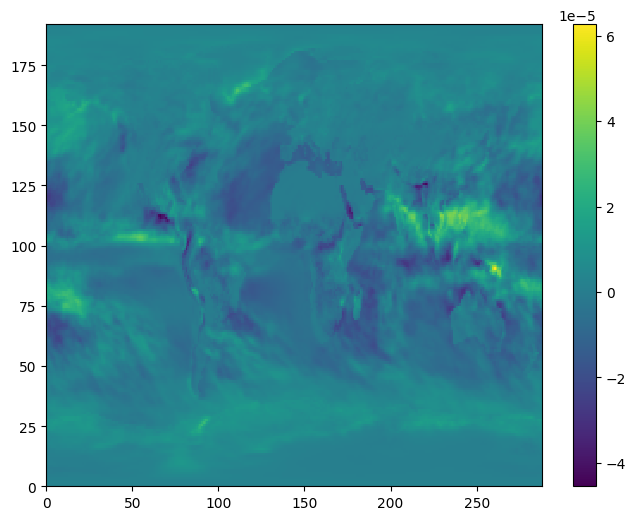

In [44]:
plt.pcolormesh(pe_maps[0])
plt.colorbar()

(508, 192, 288) -187821179.37349397


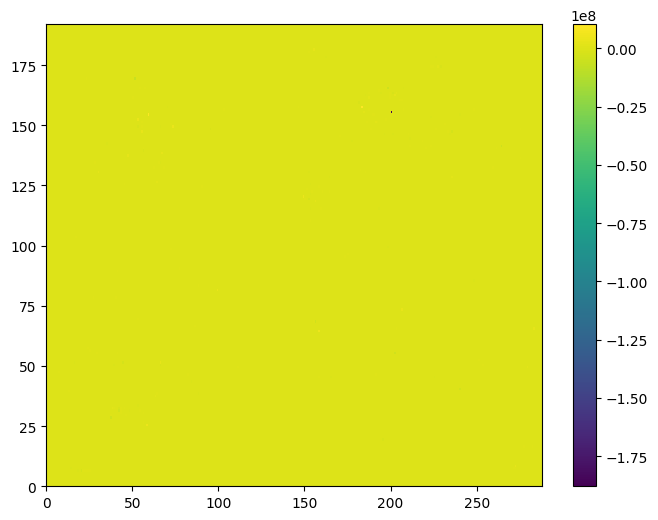

In [45]:
plt.pcolormesh(lwp_pe_map[0])
plt.colorbar()
print(lwp_maps.shape, np.min(lwp_pe_map[0]))

In [49]:
lat4k = data['lat']
lon4k = data['lon']

In [50]:
np.shape(lwp_maps)

(254, 192, 288)

In [55]:
lat_sh = pe_maps.shape[1]
lon_sh = pe_maps.shape[2]
correlation = np.full((lat_sh, lon_sh), np.nan)
grad = np.array(grad)
lwp_pe_map  = np.array(lwp_pe_map)
for i in range(lat_sh):
    for j in range(lon_sh):
        correlation[i,j] = stats.spearmanr(grad, lwp_maps[:,i,j], nan_policy='omit')[0]

In [56]:
correlation.shape

(192, 288)

In [60]:
from dm_get_land_mask import get_land_mask

In [61]:
mask = get_land_mask(lat4k, lon4k)

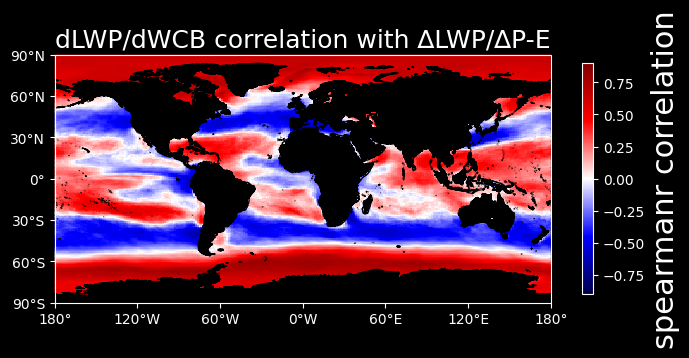

done


In [62]:
#### check whether the data are on ocean
import numpy as np
import matplotlib.pyplot as plt
import cartopy as cart
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

with plt.style.context('dark_background'):
    ax = plt.axes(projection=cart.crs.PlateCarree())
    # ax.add_feature(cart.feature.LAND, zorder=10, edgecolor='k')
    ax.coastlines(resolution='10m', zorder=2)
    # Set the desired extent
    extent = [-180, 180, -90, 90]  # [lon_min, lon_max, lat_min, lat_max]
    ax.set_extent(extent, crs=cart.crs.PlateCarree())
    ax.set_xticks(range(-180, 181, 60), crs=cart.crs.PlateCarree())
    ax.set_yticks(range(-90, 91, 30), crs=cart.crs.PlateCarree(central_longitude=180))
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    pc=ax.pcolormesh(lon4k, lat4k, correlation*mask, vmin=-0.9, vmax=0.9, cmap='seismic')
    plt.colorbar(pc, shrink=0.5, label='spearmanr correlation')
    plt.title('dLWP/dWCB correlation with ∆LWP/∆P-E')
    # plt.savefig('figures/PMM/dLWP_dPrecip_LWP_PE_correlation.png',
    #                  bbox_inches='tight',dpi=500)
    plt.show()
    
print('done')


# dLWP/dWCB correlation with ∆LWP/P-E in bins of subsidence on 2D map

# dLWP/dWCB for each latitude band correlation with ∆LWP/P-E on 2D map

In [32]:
from cyclone_composite_PPE.get_data_arr import get_data

In [33]:
all_en = np.arange(263)
skip_value = [22, 26, 137, 156, 188, 191, 192, 198, 223]
new_en = np.delete(all_en, skip_value)

In [34]:
dataout = get_data(new_en,type_data='mean') # runs through n number of PPE with the stat

In [ ]:
##### take 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy as cart
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


In [4]:
#### take ∆LWP/∆P-E map
wd  = '/glade/campaign/uwyo/wyom0124/statistics_dan/ff/'
fns = np.sort(glob.glob(wd+'*ffv2.npz'))
data = np.load(fns[0])
lwp_maps= np.zeros((len(fns),192,288))*np.nan
pe_maps= np.zeros((len(fns),192,288))*np.nan
for i in range(len(fns)):
    data=np.load(fns[i])
    lwp_maps[i] = data['map_dLWP4K']
    pe_maps[i] = data['map_dPE4K']

In [5]:
lwp_pe_map = lwp_maps/pe_maps

/glade/derecho/scratch/geethma/tmp/ipykernel_10601/3033311419.py:1: RuntimeWarning: invalid value encountered in true_divide
  lwp_pe_map = lwp_maps/pe_maps


In [23]:
file = np.load('PPE_emulator/grad_LWP_WCB_SH5080_alltimes.npz')
# convert np array to xarrays
PPE_grad_LWP_WCB = xr.DataArray(
    file['grad_LWP_WCB'],
    dims=['runs'],
    coords={'runs': file['runs']}
)

In [24]:
lats = data['lat']
'''change here to update the latitude range'''
max_l = -50
min_l = -80
indices = np.where((lats<max_l)&(lats>min_l))

lon_sh = pe_maps.shape[2]
correlation = np.full((pe_maps.shape[1], lon_sh), np.nan)
grad = np.array(PPE_grad_LWP_WCB.data)
lwp_pe_map  = np.array(lwp_pe_map)
for i in indices[0]:
    for j in range(lon_sh):
        correlation[i,j] = stats.spearmanr(grad, lwp_maps[:,i,j], nan_policy='omit')[0]

In [35]:
lwp = dataout['TGCLDLWP'] #[kg/m2]
u   = dataout['U10'] #[m/s]
w   = dataout['TMQ'] #kg/m2


In [ ]:
# all_en = np.arange(263)
# skip_value = [22, 26, 137, 156, 188, 191, 192, 198, 223]
# new_en = np.delete(all_en, skip_value)

# ########### with the weighted gradient 
# ########## calculate gradients for each ensemble
# num_bins = 10
# # num_ens  = 263
# grad     = []#[np.nan for _ in range(254)]
# # # bin_c    = [np.nan for _ in range(254)]
# # skip_value = [22, 26, 137, 156, 188, 191, 192, 198, 223, 254]

# for en in range(len(new_en)):
#     lwp_i   = lwp[en]
#     prc_i   = u[en] * w[en] *2.66e-7*86400
#     lwp_bin = stats.binned_statistic(prc_i, lwp_i, statistic='mean', bins=num_bins)[0]

#     prc_bin = stats.binned_statistic(prc_i, prc_i, statistic='mean', bins=num_bins)[0]
#     count   = stats.binned_statistic(prc_i, prc_i, statistic='count', bins=num_bins)[0]
    
#     grad.append(np.nansum(np.gradient(lwp_bin)/np.gradient(prc_bin)*count)/np.nansum(count))

# grad = np.array(grad)
# print(grad.shape)   

In [25]:
file = np.load('PPE_emulator/grad_LWP_WCB_NH5080_alltimes.npz')
# convert np array to xarrays
PPE_grad_LWP_WCB = xr.DataArray(
    file['grad_LWP_WCB'],
    dims=['runs'],
    coords={'runs': file['runs']}
)


In [26]:
lats = data['lat']
'''change here to update the latitude range'''
max_l = 80
min_l = 50
indices = np.where((lats<max_l)&(lats>min_l))

lon_sh = pe_maps.shape[2]
# correlation = np.full((pe_maps.shape[1], lon_sh), np.nan)
grad = np.array(PPE_grad_LWP_WCB.data)
lwp_pe_map  = np.array(lwp_pe_map)
for i in indices[0]:
    for j in range(lon_sh):
        correlation[i,j] = stats.spearmanr(grad, lwp_maps[:,i,j], nan_policy='omit')[0]

In [43]:
file = np.load('PPE_emulator/grad_LWP_WCB_SH2050_alltimes.npz')
# convert np array to xarrays
PPE_grad_LWP_WCB = xr.DataArray(
    file['grad_LWP_WCB'],
    dims=['runs'],
    coords={'runs': file['runs']}
)

In [44]:
lats = data['lat']
'''change here to update the latitude range'''
max_l = -20
min_l = -50
indices = np.where((lats<max_l)&(lats>min_l))

lon_sh = pe_maps.shape[2]
# correlation = np.full((pe_maps.shape[1], lon_sh), np.nan)
grad = np.array(PPE_grad_LWP_WCB.data)
lwp_pe_map  = np.array(lwp_pe_map)
for i in indices[0]:
    for j in range(lon_sh):
        correlation[i,j] = stats.spearmanr(grad, lwp_maps[:,i,j], nan_policy='omit')[0]

In [36]:
file = np.load('PPE_emulator/grad_LWP_WCB_NH2050_alltimes.npz')
# convert np array to xarrays
PPE_grad_LWP_WCB = xr.DataArray(
    file['grad_LWP_WCB'],
    dims=['runs'],
    coords={'runs': file['runs']}
)

In [37]:
lats = data['lat']
'''change here to update the latitude range'''
max_l = 50
min_l = 20
indices = np.where((lats<max_l)&(lats>min_l))

lon_sh = pe_maps.shape[2]
# correlation = np.full((pe_maps.shape[1], lon_sh), np.nan)
grad = np.array(PPE_grad_LWP_WCB.data)
lwp_pe_map  = np.array(lwp_pe_map)
for i in indices[0]:
    for j in range(lon_sh):
        correlation[i,j] = stats.spearmanr(grad, lwp_maps[:,i,j], nan_policy='omit')[0]

In [39]:
file = np.load('PPE_emulator/grad_LWP_WCB_EQ2020_alltimes.npz')
# convert np array to xarrays
PPE_grad_LWP_WCB = xr.DataArray(
    file['grad_LWP_WCB'],
    dims=['runs'],
    coords={'runs': file['runs']}
)

In [40]:
lats = data['lat']
'''change here to update the latitude range'''
max_l = 20
min_l = -20
indices = np.where((lats<max_l)&(lats>min_l))

lon_sh = pe_maps.shape[2]
# correlation = np.full((pe_maps.shape[1], lon_sh), np.nan)
grad = np.array(PPE_grad_LWP_WCB.data)
lwp_pe_map  = np.array(lwp_pe_map)
for i in indices[0]:
    for j in range(lon_sh):
        correlation[i,j] = stats.spearmanr(grad, lwp_maps[:,i,j], nan_policy='omit')[0]

In [11]:
lat4k = data['lat']
lon4k = data['lon']

In [12]:
from dm_get_land_mask import get_land_mask

In [13]:
mask = get_land_mask(lat4k, lon4k)

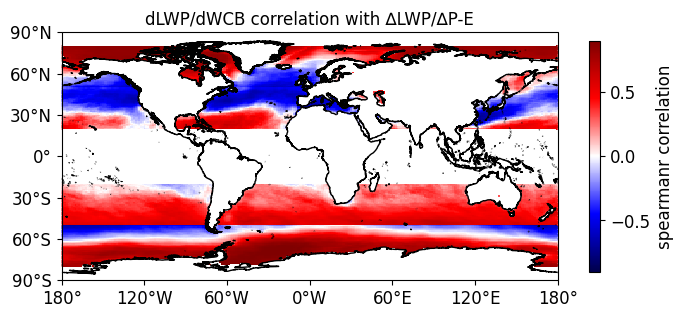

done


In [45]:
ax = plt.axes(projection=cart.crs.PlateCarree())
# ax.add_feature(cart.feature.LAND, zorder=10, edgecolor='k')
ax.coastlines(resolution='10m', zorder=2)
# Set the desired extent
extent = [-180, 180, -90, 90]  # [lon_min, lon_max, lat_min, lat_max]
ax.set_extent(extent, crs=cart.crs.PlateCarree())
ax.set_xticks(range(-180, 181, 60), crs=cart.crs.PlateCarree())
ax.set_yticks(range(-90, 91, 30), crs=cart.crs.PlateCarree(central_longitude=180))
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
pc=ax.pcolormesh(lon4k, lat4k, correlation*mask, vmin=-0.9, vmax=0.9, cmap='seismic')
plt.colorbar(pc, shrink=0.5, label='spearmanr correlation')
plt.title('dLWP/dWCB correlation with ∆LWP/∆P-E')
# plt.savefig('figures/PMM/dLWP_dPrecip_LWP_PE_correlation.png',
#                  bbox_inches='tight',dpi=500)
plt.show()
    
print('done')


# Test latitudeCycloneSave.py

In [1]:
import sys
sys.path.append("/glade/u/home/geethma/phd_research_home/functions")
from functions.imports import *

from cyclone_composite_PPE.get_data_arr import get_data

# def globalCyclone(max_l, min_l):
# for lat bands 50-80N
all_en = np.arange(263)
skip_value = [22, 26, 137, 156, 188, 191, 192, 198, 223]
new_en = np.delete(all_en, skip_value)

get_var = get_data(new_en, type_data='comp')




ERROR 1: PROJ: proj_create_from_database: Open of /glade/u/home/geethma/.conda/envs/wgh/share/proj failed


In [31]:
get_var['OMEGA500']

KeyError: 'OMEGA500'

In [27]:
lat = get_var['lat']
lon = get_var['lon']
# Get the cyclone numbers non-nan fracton>0.5
new_ens = []
new_lats = [np.nan for _ in range(len(new_en))]
new_lons = [np.nan for _ in range(len(new_en))]
for i in range(len(new_en)): # 
    # get latitudes band
    arr  = lat[i].copy()
    arr  = np.array(arr)
    '''change here to update the latitude range'''
    max_l = 20
    min_l = -20

    ind = np.where((arr > max_l) | (arr < min_l))
    arr[ind] = np.nan
    arr_lon  = lon[i].copy()
    arr_lon[ind] = np.nan
    new_lats[i] = arr
    new_lons[i] = arr_lon


     # check non-Nan of a composite to be > 0.5
    cyc_num = []
    var = get_var['TGCLDLWP'][i]
    var[:,:,ind] = np.nan # for one hemisphere

    for cyc in range(var.shape[2]): #
        flat_var = np.ravel(var[:,:,cyc])
        find = np.where(np.isnan(flat_var)==False)
        frac = np.shape(find)[1]/np.shape(flat_var)[0]
        if frac > 0.5:
            cyc_num.append(cyc)
    new_ens.append(np.ravel(cyc_num))



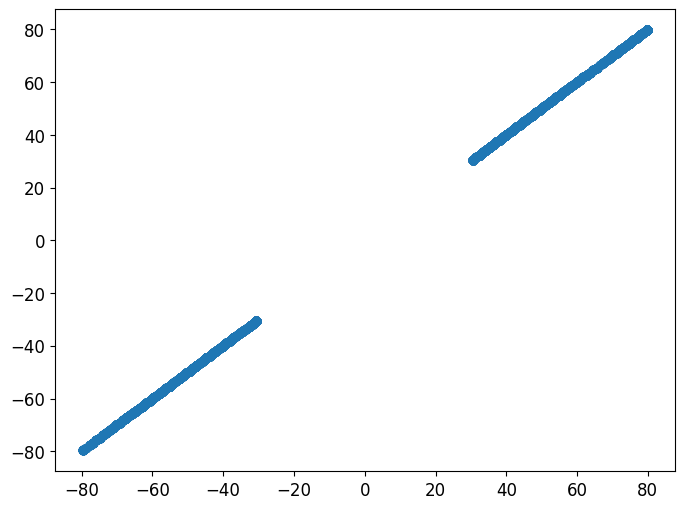

In [30]:
plt.scatter(lat[0], lat[0])

In [ ]:
dataout = get_data(new_en,type_data='mean') # runs through n number of PPE with the stat
lwp = dataout['TGCLDLWP'] #[kg/m2]
u   = dataout['U10'] #[m/s]
w   = dataout['TMQ'] #kg/m2

########### with the weighted gradient 
########## calculate gradients for each ensemble
num_bins = 10
grad = [np.nan for _ in range(len(new_en))]

for en in range(len(new_en)): # 
    try:
        lwp_i = lwp[en][new_ens[en]]
        wcb_i = u[en][new_ens[en]] * w[en][new_ens[en]] *2.66e-7*86400
        # wcb_i   = (dataout['PRECC'][en][new_ens[en]]+dataout['PRECL'][en][new_ens[en]])*8.64e7 #[mm/day]
        lwp_bin = stats.binned_statistic(wcb_i, lwp_i, 
                                         statistic='mean', bins=num_bins)[0]
        wcb_bin = stats.binned_statistic(wcb_i, wcb_i, 
                                         statistic='mean', bins=num_bins)[0]
        count   = stats.binned_statistic(wcb_i, wcb_i, 
                                         statistic='count', bins=num_bins)[0]
        grad[en] = np.nansum(
            np.gradient(lwp_bin)/np.gradient(wcb_bin)*count)/np.nansum(count)
    except:
        print(en, new_ens[en])

grad = np.array(grad)
np.savez('PPE_emulator/grad_LWP_WCB_EQ2020_alltimes.npz', 
         grad_LWP_WCB = grad, runs = new_en)

In [50]:
from cyclone_composite_PPE_global.get_data_arr import get_data

In [51]:
new_en = [0]

In [52]:
dataout = get_data(new_en,type_data='mean') # runs through n number of PPE with the stat
lwp = dataout['TGCLDLWP'] #[kg/m2]
u = dataout['U10'] #[m/s]
w = dataout['TMQ'] #kg/m2
omg500 = dataout['OMEGA500']

In [46]:
omg500

[array([ 0.01067024, -0.05243059, -0.02260843, -0.02044084,  0.01169443,
        -0.02323681, -0.01655601,  0.01841328,  0.0327106 ,  0.00375673,
        -0.00366923, -0.02258258, -0.00382975, -0.00746802, -0.00012894,
        -0.02851799])]

In [53]:
lat = dataout['lat']
lon = dataout['lon']

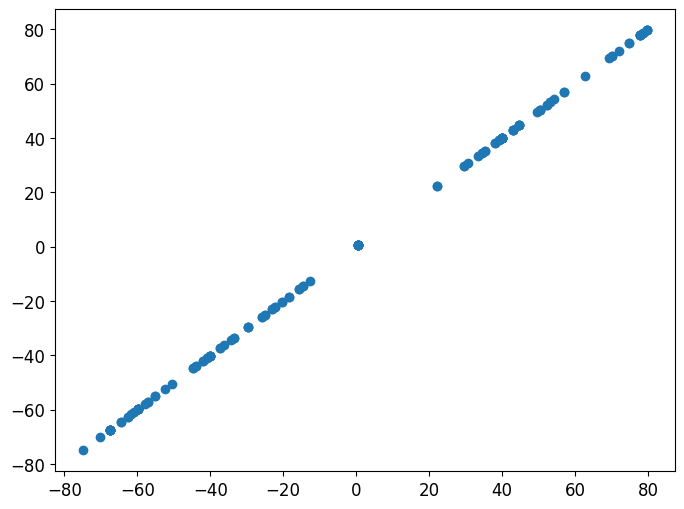

In [54]:
plt.scatter(lat[0], lat[0])

In [49]:
lat[0]

array([-34.39790576,  40.05235602, -70.20942408,  79.63350785,
       -44.76439791, -57.95811518,  30.62827225,  54.18848168,
       -36.28272251, -50.41884817,  69.26701571, -12.72251309,
       -61.72774869,  77.7486911 ,  44.76439791, -57.01570681])